In [1]:
import pandas as pd
import numpy as np

## 1.	Загрузите датасет event_data.csv, который содержит данные использования мобильного приложения пользователей, зарегистрировавшихся в период с 29 июля по 1 сентября 2019 года:
•	user_id - идентификатор пользователя;

•	event_date - время совершения события;

•	event_type - тип события: registration - регистрация в приложении; simple_event - событие клика в приложении; purchase - событие покупки внутри приложения; purchase_amount - величина покупки.


In [2]:
df = pd.read_csv('../data/event_data.csv', parse_dates=['event_date'])

In [3]:
df.head()

,user_id,event_date,event_type,purchase_amount
0,c40e6a,2019-07-29 00:02:15,registration,NaN
1,a2b682,2019-07-29 00:04:46,registration,NaN
2,9ac888,2019-07-29 00:13:22,registration,NaN
3,93ff22,2019-07-29 00:16:47,registration,NaN
4,65ef85,2019-07-29 00:19:23,registration,NaN


In [4]:
df.shape

(79742, 4)

In [5]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79742 entries, 0 to 79741
Data columns (total 4 columns):
user_id            79742 non-null object
event_date         79742 non-null datetime64[ns]
event_type         79742 non-null object
purchase_amount    6207 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.4+ MB


In [6]:
df.describe()

,purchase_amount
count,6207.000000
mean,30.035444
std,14.101013
min,10.000000
25%,20.000000
50%,30.000000
75%,40.000000
max,50.000000


In [7]:
df['event_date'].min(), df['event_date'].max()

(Timestamp('2019-07-29 00:02:15'), Timestamp('2019-09-01 23:59:54'))

In [8]:
# Количество дней, охваченных датасетом
df['event_date'].max() - df['event_date'].min() + pd.Timedelta('1 days')

Timedelta('35 days 23:57:39')

## 2.	Выделите когорты пользователей на основе недели регистрации в приложении. Идентификатором когорты должен быть порядковый номер недели (например, неделя с 29 июля по 4 августа должна иметь идентификатор 31).

In [9]:
df['kogort'] = np.where(df['event_type']=='registration', \
         df['event_date'].dt.week.astype('int'),\
         np.nan )



In [10]:
df.head()

,user_id,event_date,event_type,purchase_amount,kogort
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31.0
1,a2b682,2019-07-29 00:04:46,registration,NaN,31.0
2,9ac888,2019-07-29 00:13:22,registration,NaN,31.0
3,93ff22,2019-07-29 00:16:47,registration,NaN,31.0
4,65ef85,2019-07-29 00:19:23,registration,NaN,31.0


In [11]:
df['user_id'].unique().shape

(9996,)

In [12]:
df.loc[df['event_type']=='registration'].shape

(9996, 5)

In [13]:
df.loc[~df['kogort'].isnull()]['user_id'].unique().shape 

(9996,)

####  => доказано взаимооднозначное соответствие пользователей и регистраций



#### Для дальнейшего анализа установим базовые количества пользователей по когортам

In [14]:
kog_base = df.groupby(['kogort']).count()['user_id']

In [15]:
kog_base = kog_base.to_frame().rename(columns={'user_id':'kog_base'}).reset_index()

In [16]:
kog_base

,kogort,kog_base
0,31.0,1975
1,32.0,1952
2,33.0,2045
3,34.0,1974
4,35.0,2050


In [17]:
df = df.merge(kog_base, on=['kogort'], how='left')

In [18]:
df

,user_id,event_date,event_type,purchase_amount,kogort,kog_base
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31.0,1975.0
1,a2b682,2019-07-29 00:04:46,registration,NaN,31.0,1975.0
2,9ac888,2019-07-29 00:13:22,registration,NaN,31.0,1975.0
3,93ff22,2019-07-29 00:16:47,registration,NaN,31.0,1975.0
4,65ef85,2019-07-29 00:19:23,registration,NaN,31.0,1975.0
...,...,...,...,...,...,...
79737,930c23,2019-09-01 23:57:41,simple_event,NaN,NaN,NaN
79738,a84999,2019-09-01 23:57:50,simple_event,NaN,NaN,NaN
79739,175e4d,2019-09-01 23:59:40,simple_event,NaN,NaN,NaN
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN,NaN,NaN


#### Распространим когорты на остальные строки датасета:

In [19]:
df_cog = df.loc[~df['kogort'].isnull()][['user_id', 'kogort', 'kog_base']]

In [20]:
df_cog

,user_id,kogort,kog_base
0,c40e6a,31.0,1975.0
1,a2b682,31.0,1975.0
2,9ac888,31.0,1975.0
3,93ff22,31.0,1975.0
4,65ef85,31.0,1975.0
...,...,...,...
79697,a7c20c,35.0,2050.0
79703,03e836,35.0,2050.0
79710,fb0e00,35.0,2050.0
79712,46b4f8,35.0,2050.0


In [21]:
df = df.drop(columns=['kogort', 'kog_base'])

In [22]:
df = df.merge(df_cog, how='inner', on='user_id')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79742 entries, 0 to 79741
Data columns (total 6 columns):
user_id            79742 non-null object
event_date         79742 non-null datetime64[ns]
event_type         79742 non-null object
purchase_amount    6207 non-null float64
kogort             79742 non-null float64
kog_base           79742 non-null float64
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 4.3+ MB


## 3.	Какое количество уникальных пользователей в когорте с идентификатором 33?

In [24]:
df.loc[df['kogort']==33]['user_id'].unique().shape[0]

2045

## 4.	Для каждого события выделите показатель lifetime — понедельное время жизни когорты. Показатель lifetime рассчитывают на основе порядкового номера недели, в которую совершено событие, относительно недели регистрации. Например, событие, совершённое 3 августа пользователем из когорты зарегистрировавшихся в 31 неделю, будет совершено в нулевую неделю lifetime, а событие, совершенное этим же пользователем 5 августа — в первую неделю lifetime).

In [25]:
df['lifetime'] = df['event_date'].dt.week.astype('int') - df['kogort']

In [26]:
df.to_csv('kogort.csv', sep=';')

In [27]:
df

,user_id,event_date,event_type,purchase_amount,kogort,kog_base,lifetime
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31.0,1975.0,0.0
1,c40e6a,2019-07-29 21:13:24,simple_event,NaN,31.0,1975.0,0.0
2,c40e6a,2019-07-30 22:20:50,simple_event,NaN,31.0,1975.0,0.0
3,c40e6a,2019-08-01 13:13:01,simple_event,NaN,31.0,1975.0,0.0
4,c40e6a,2019-08-02 11:19:11,simple_event,NaN,31.0,1975.0,0.0
...,...,...,...,...,...,...,...
79737,a7c20c,2019-09-01 23:36:39,registration,NaN,35.0,2050.0,0.0
79738,03e836,2019-09-01 23:38:18,registration,NaN,35.0,2050.0,0.0
79739,fb0e00,2019-09-01 23:41:25,registration,NaN,35.0,2050.0,0.0
79740,46b4f8,2019-09-01 23:41:57,registration,NaN,35.0,2050.0,0.0


## 5.	Постройте сводную таблицу изменения показателя Retention Rate по когортам в зависимости от lifetime.

In [28]:
kog_tend = df.groupby(['kogort', 'lifetime', 'user_id']).min()['kog_base']

In [29]:
kog_tend = kog_tend.to_frame().reset_index().groupby(['kogort', 'lifetime']).\
agg({'user_id':'count','kog_base':'min'}).reset_index().rename(columns={'user_id':'user_count'})

In [30]:
kog_tend['retention_rate'] = kog_tend['user_count'] / kog_tend['kog_base'] 

In [31]:
pd.pivot_table(kog_tend, values='retention_rate', index=['kogort'], columns=['lifetime']).round(2)

lifetime,0.0,1.0,2.0,3.0,4.0
kogort,,,,,
31.0,1.0,0.93,0.63,0.36,0.15
32.0,1.0,0.93,0.65,0.36,NaN
33.0,1.0,0.92,0.66,NaN,NaN
34.0,1.0,0.93,NaN,NaN,NaN
35.0,1.0,NaN,NaN,NaN,NaN


## 6.	Какой Retention Rate на 3 неделю lifetime у когорты с идентификатором 32? Ответ дай в процентах с округлением до 2 знаков после запятой включительно.

In [32]:
0.36

0.36

## 7.	Постройте сводную таблицу изменения показателя ARPPU (Average Revenue Per Paying User) по когортам в зависимости от lifetime.

In [33]:
# установим покупающих клиентов и добавим признак к исходному датафрейму
df.loc[df['event_type']=='purchase', ['user_id']]['user_id'].unique().shape

(4283,)

In [34]:
paying_users = pd.DataFrame(df.loc[df['event_type']=='purchase', ['user_id']]['user_id'].unique(), columns=['user_id'])
paying_users['is_paying'] = 1

In [35]:
df = df.merge(paying_users, how='left', on='user_id')

In [36]:
df

,user_id,event_date,event_type,purchase_amount,kogort,kog_base,lifetime,is_paying
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31.0,1975.0,0.0,1.0
1,c40e6a,2019-07-29 21:13:24,simple_event,NaN,31.0,1975.0,0.0,1.0
2,c40e6a,2019-07-30 22:20:50,simple_event,NaN,31.0,1975.0,0.0,1.0
3,c40e6a,2019-08-01 13:13:01,simple_event,NaN,31.0,1975.0,0.0,1.0
4,c40e6a,2019-08-02 11:19:11,simple_event,NaN,31.0,1975.0,0.0,1.0
...,...,...,...,...,...,...,...,...
79737,a7c20c,2019-09-01 23:36:39,registration,NaN,35.0,2050.0,0.0,NaN
79738,03e836,2019-09-01 23:38:18,registration,NaN,35.0,2050.0,0.0,NaN
79739,fb0e00,2019-09-01 23:41:25,registration,NaN,35.0,2050.0,0.0,NaN
79740,46b4f8,2019-09-01 23:41:57,registration,NaN,35.0,2050.0,0.0,NaN


In [37]:
# установим количество покупающих клиентов в каждой когорте
kog_arpu_base = df.loc[(df['event_type']=='registration') & (df['is_paying']==1), ['kogort', 'user_id']].\
groupby('kogort').count().reset_index().rename(columns={'user_id':'p_user_count'})

In [38]:
kog_arpu_base

,kogort,p_user_count
0,31.0,1075
1,32.0,1084
2,33.0,1035
3,34.0,752
4,35.0,337


In [39]:
kog_arpu_base['p_user_count'].sum()

4283

In [40]:
# посчитаем суммы покупок в разрезе kogort+lifetime
kog_arppu_sum = df.groupby(['kogort', 'lifetime']).agg({'purchase_amount':'sum'})

In [41]:
kog_arppu_sum

purchase_amount
kogort lifetime                 
31.0   0.0                8890.0
       1.0               20540.0
       2.0               12210.0
       3.0                6120.0
       4.0                2010.0
32.0   0.0               10850.0
       1.0               21050.0
       2.0               12600.0
       3.0                6260.0
33.0   0.0                9790.0
       1.0               21730.0
       2.0               13740.0
34.0   0.0                9510.0
       1.0               19640.0
35.0   0.0               11490.0

In [42]:
# соединим и сформируем итоговую таблицу
arppu = kog_arppu_sum.reset_index().merge(kog_arpu_base, on='kogort')
arppu.head()

,kogort,lifetime,purchase_amount,p_user_count
0,31.0,0.0,8890.0,1075
1,31.0,1.0,20540.0,1075
2,31.0,2.0,12210.0,1075
3,31.0,3.0,6120.0,1075
4,31.0,4.0,2010.0,1075


In [43]:
arppu['value'] = arppu['purchase_amount'] / arppu['p_user_count']

In [44]:
arppu.head()

,kogort,lifetime,purchase_amount,p_user_count,value
0,31.0,0.0,8890.0,1075,8.269767
1,31.0,1.0,20540.0,1075,19.106977
2,31.0,2.0,12210.0,1075,11.358140
3,31.0,3.0,6120.0,1075,5.693023
4,31.0,4.0,2010.0,1075,1.869767


In [45]:
pd.pivot_table(arppu, values='value', index=['kogort'], columns=['lifetime']).round(2)

lifetime,0.0,1.0,2.0,3.0,4.0
kogort,,,,,
31.0,8.27,19.11,11.36,5.69,1.87
32.0,10.01,19.42,11.62,5.77,NaN
33.0,9.46,21.00,13.28,NaN,NaN
34.0,12.65,26.12,NaN,NaN,NaN
35.0,34.09,NaN,NaN,NaN,NaN


## 8.	Какой ARPPU на 3 неделю lifetime у когорты с идентификатором 31? Ответ дай числом с плавающей запятой с округлением до 2 знаков после запятой включительно.

In [46]:
5.69

5.69

## 9.	Какое медианное время проходит между регистрацией пользователя и первой покупкой? Ответ дайте в секундах (!) целым числом.

In [47]:
df.head()

,user_id,event_date,event_type,purchase_amount,kogort,kog_base,lifetime,is_paying
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31.0,1975.0,0.0,1.0
1,c40e6a,2019-07-29 21:13:24,simple_event,NaN,31.0,1975.0,0.0,1.0
2,c40e6a,2019-07-30 22:20:50,simple_event,NaN,31.0,1975.0,0.0,1.0
3,c40e6a,2019-08-01 13:13:01,simple_event,NaN,31.0,1975.0,0.0,1.0
4,c40e6a,2019-08-02 11:19:11,simple_event,NaN,31.0,1975.0,0.0,1.0


In [48]:
a = df.loc[(df['event_type']=='registration'), ['user_id', 'event_date']].\
rename(columns={'event_date':'reg_date'})
a.shape

(9996, 2)

In [49]:
a.head()

,user_id,reg_date
0,c40e6a,2019-07-29 00:02:15
19,a2b682,2019-07-29 00:04:46
30,9ac888,2019-07-29 00:13:22
35,93ff22,2019-07-29 00:16:47
43,65ef85,2019-07-29 00:19:23


In [50]:
b = df.loc[(df['event_type']=='purchase'), ['user_id', 'event_date']].groupby(['user_id']).\
agg({'event_date':'min'}).reset_index().rename(columns={'event_date':'purchase_date'})
b.shape

(4283, 2)

In [51]:
b.head()

,user_id,purchase_date
0,00049f,2019-08-18 17:31:56
1,00082c,2019-08-14 12:57:41
2,001d5d,2019-08-26 13:03:22
3,002195,2019-08-18 22:35:43
4,0025c1,2019-08-10 11:37:00


In [52]:
c = b.merge(a, on='user_id')
c['lag'] = c['purchase_date'] - c['reg_date']

In [53]:
c['lag'] = c['lag'].dt.total_seconds()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C73FBF9BE0>]],
      dtype=object)

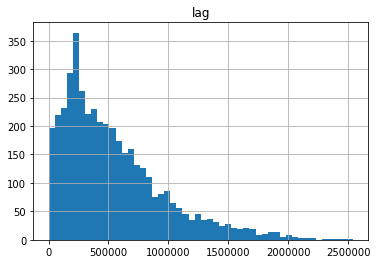

In [54]:
c['lag'].to_frame().hist(bins=50)

In [55]:
c['lag'].median()

434774.0